In [1]:
from google.colab import files
uploaded = files.upload()

Saving my_movies.csv to my_movies (1).csv


In [2]:
import pandas as pd
import numpy as np
movies = pd.read_csv("my_movies.csv")

In [3]:
movies.info

<bound method DataFrame.info of               V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2      

In [4]:
movie = movies.drop(['V1','V2','V3','V4','V5'], axis = 1)
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [16]:
# Creating the DataFrame
data = {
    "Sixth Sense": [1, 0, 0, 1, 1, 1, 0, 0, 1, 1],
    "Gladiator": [0, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    "LOTR1": [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "Harry Potter1": [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    "Patriot": [0, 1, 0, 0, 0, 0, 1, 1, 1, 0],
    "LOTR2": [1, 0, 1, 1, 1, 1, 0, 0, 0, 0],
    "Harry Potter2": [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    "LOTR": [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    "Braveheart": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Green Mile": [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]}

movies = pd.DataFrame(data)

# Applying the Apriori algorithm
from mlxtend.frequent_patterns import apriori, association_rules
aprii = apriori(movies, min_support=0.1, use_colnames=True)
print(aprii)


    support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.4                                          (Patriot)
5       0.5                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.2                                             (LOTR)
8       0.2                                       (Green Mile)
9       0.5                           (Sixth Sense, Gladiator)
10      0.1                               (Sixth Sense, LOTR1)
11      0.1                       (Sixth Sense, Harry Potter1)
12      0.1                             (Sixth Sense, Patriot)
13      0.4                               (Sixth Sense, LOTR2)
14      0.1                                (Sixth Sense

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [17]:
rules1 = association_rules(aprii, metric="lift", min_threshold=0.6)
rules1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.800,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.400,0.533333
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960,-0.333333
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800,-0.200000
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960,-0.333333
...,...,...,...,...,...,...,...,...,...,...
257,(Sixth Sense),"(LOTR2, Harry Potter1, Green Mile, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.080,1.000000
258,(Harry Potter1),"(Sixth Sense, LOTR2, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.800,1.000000
259,(LOTR2),"(Sixth Sense, Harry Potter1, Green Mile, LOTR1)",0.5,0.1,0.1,0.200000,2.000000,0.05,1.125,1.000000
260,(Green Mile),"(Sixth Sense, LOTR2, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.800,1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

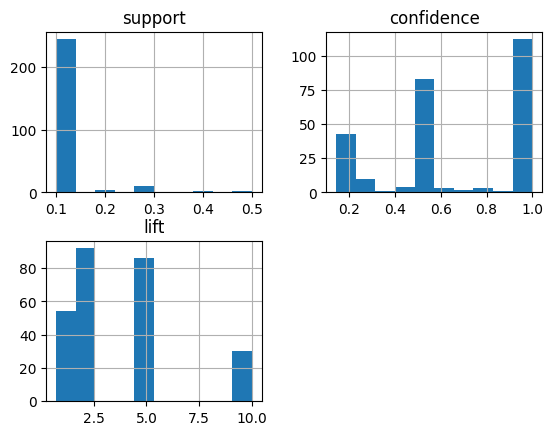

In [18]:
rules1[['support','confidence','lift']].hist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


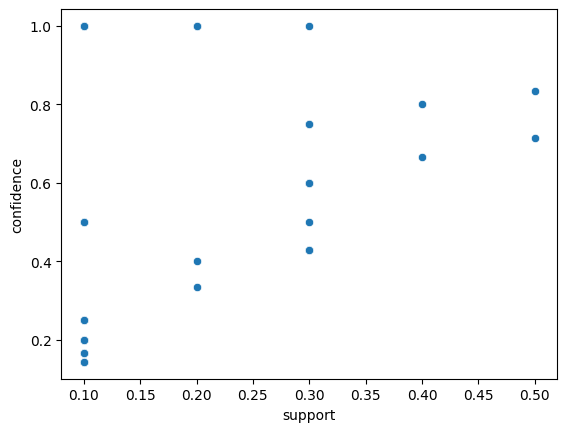

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=rules1, x='support', y='confidence')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


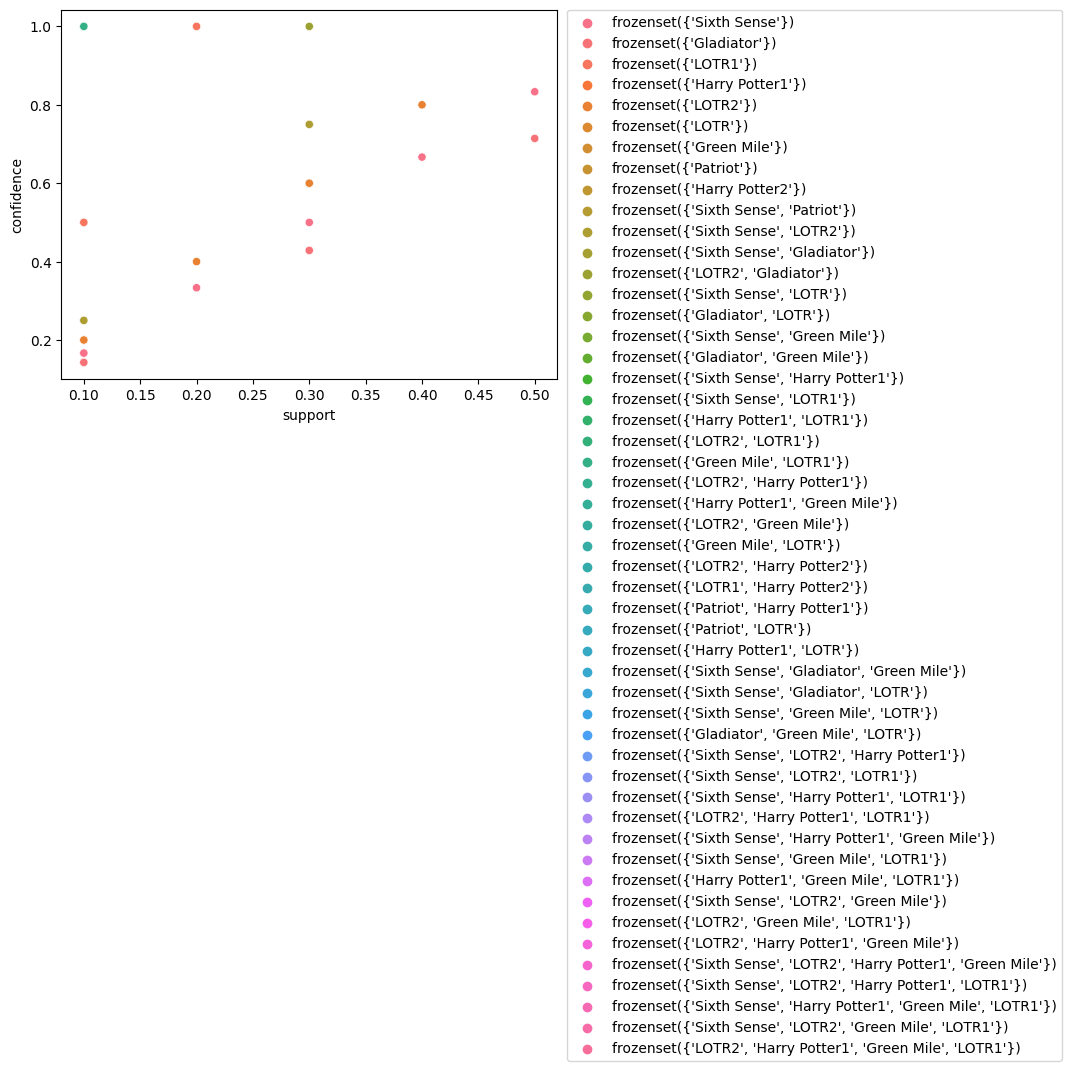

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x='support', y='confidence', data=rules1, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()